In [2]:
import ast
import pandas as pd

# Import Census county lat/long 

In [84]:
df=pd.read_table('2021_Gaz_counties_national.txt',  sep = "\t")
geocode = df.iloc[:,[0,3,8,9]]
geocode

,USPS,NAME,INTPTLAT,INTPTLONG
0,AL,Autauga County,32.532237,-86.646440
1,AL,Baldwin County,30.659218,-87.746067
2,AL,Barbour County,31.870253,-85.405104
3,AL,Bibb County,33.015893,-87.127148
4,AL,Blount County,33.977358,-86.566440
...,...,...,...,...
3216,PR,Vega Baja Municipio,18.455128,-66.397883
3217,PR,Vieques Municipio,18.125418,-65.432474
3218,PR,Villalba Municipio,18.130718,-66.472244
3219,PR,Yabucoa Municipio,18.059858,-65.859871


* Remove VA: Fairfax city since there is also a county in VA that is Fairfax. This is for matching with Bloomberg bond yeild dataset 

In [85]:
geocode = geocode[geocode["NAME"].str.contains("Fairfax city")==False]
geocode

,USPS,NAME,INTPTLAT,INTPTLONG
0,AL,Autauga County,32.532237,-86.646440
1,AL,Baldwin County,30.659218,-87.746067
2,AL,Barbour County,31.870253,-85.405104
3,AL,Bibb County,33.015893,-87.127148
4,AL,Blount County,33.977358,-86.566440
...,...,...,...,...
3216,PR,Vega Baja Municipio,18.455128,-66.397883
3217,PR,Vieques Municipio,18.125418,-65.432474
3218,PR,Villalba Municipio,18.130718,-66.472244
3219,PR,Yabucoa Municipio,18.059858,-65.859871


In [87]:
geocode.to_csv('count_lat_long.csv')

* remove the last word in "NAME" to only keep county name. This is for matching with Bloomberg bond yield dataset

In [63]:
geocode['NAME'] = geocode['NAME'].str.rsplit(' ',1).str[0]
# geocode[['County', 'State']] = county_names
# geocode['NAME'] = geocode['NAME'].str.rsplit(' ',1).str[0]
# geocode['NAME'] = county_names
geocode

C:\Users\lidan\AppData\Local\Temp\ipykernel_20852\641721130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geocode['NAME'] = geocode['NAME'].str.rsplit(' ',1).str[0]


,USPS,NAME,INTPTLAT,INTPTLONG
0,AL,Autauga,32.532237,-86.646440
1,AL,Baldwin,30.659218,-87.746067
2,AL,Barbour,31.870253,-85.405104
3,AL,Bibb,33.015893,-87.127148
4,AL,Blount,33.977358,-86.566440
...,...,...,...,...
3216,PR,Vega Baja,18.455128,-66.397883
3217,PR,Vieques,18.125418,-65.432474
3218,PR,Villalba,18.130718,-66.472244
3219,PR,Yabucoa,18.059858,-65.859871


In [65]:
yield_2017 = pd.read_excel(r'data/2017_waterMuni.xlsx', sheet_name='Sheet1')
yield_2017.head()

,CUSIP,Issuer Name,Insured Bonds,State Code,U.S. County Of Issuance,Mod Dur (Mid),Iss Spd Wst,Issue Date,Bond Purpose,Cpn,Maturity,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,BVAL Mid YTM,Tax Prov,Is Federal Taxable,MSRB Volume,BBG Composite,LQA Score
0,13063DAQ1,State of California,N,CA,"Sacramento, CA",3.029972,23.738276,9/12/2017,SCHOOL IMPS. WATER UTILITY IMPS. REFUNDING NOTES,4.0,11/1/2025,31985000,1.85,23.738276,#N/A Authorization,FED & ST TAX-EXEMPT,N,45000.0,AA-,77
1,13034ARW2,California Infrastructure & Economic Developme...,N,CA,"Sacramento, CA",1.120080,-2.797638,3/23/2017,GREEN PURPOSE WATER UTILITY IMPS.,5.0,10/1/2023,39755000,1.77,-2.797638,#N/A Authorization,FED & ST TAX-EXEMPT,N,75000.0,AAA,95
2,64986DDG7,New York State Environmental Facilities Corp,N,NY,"Albany, NY",2.680928,6.733772,4/13/2017,WATER UTILITY IMPS. CURRENT REFUNDING GREEN PU...,5.0,6/15/2025,19725000,2.24,6.733772,#N/A Authorization,FED & ST TAX-EXEMPT,N,100000.0,AAA,80
3,51219SFN3,Lakeside Water Control & Improvement District ...,Y,TX,"Travis, TX",1.048659,39.541356,12/1/2017,WATER UTILITY IMPS. SEWER IMPS.,3.0,9/1/2023,300000,2.25,39.541356,#N/A Authorization,FED BQ,N,400000.0,A,89
4,837545LL4,South Dakota Conservancy District,N,SD,"Hughes, SD",3.657233,6.352814,8/23/2017,WATER UTILITY IMPS. SEWER IMPS. ADVANCE REFUNDING,5.0,8/1/2026,6565000,1.86,6.352814,#N/A Authorization,FED TAX-EXEMPT,N,435000.0,AAA,60


* parse string (column "U.S. County Of Issuance" in yield data) to prepare for matching

In [75]:
user_names = yield_2017['U.S. County Of Issuance'].str.split(pat = ',', expand = True)
yield_2017[['County', 'State']] = user_names
yield_17 = yield_2017.iloc[:,[1,2,3, 5,6,7,9,10,11,12,13,17,18,19,20]]
yield_17.head()

,Issuer Name,Insured Bonds,State Code,Mod Dur (Mid),Iss Spd Wst,Issue Date,Cpn,Maturity,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,MSRB Volume,BBG Composite,LQA Score,County
0,State of California,N,CA,3.029972,23.738276,9/12/2017,4.0,11/1/2025,31985000,1.85,23.738276,45000.0,AA-,77,Sacramento
1,California Infrastructure & Economic Developme...,N,CA,1.120080,-2.797638,3/23/2017,5.0,10/1/2023,39755000,1.77,-2.797638,75000.0,AAA,95,Sacramento
2,New York State Environmental Facilities Corp,N,NY,2.680928,6.733772,4/13/2017,5.0,6/15/2025,19725000,2.24,6.733772,100000.0,AAA,80,Albany
3,Lakeside Water Control & Improvement District ...,Y,TX,1.048659,39.541356,12/1/2017,3.0,9/1/2023,300000,2.25,39.541356,400000.0,A,89,Travis
4,South Dakota Conservancy District,N,SD,3.657233,6.352814,8/23/2017,5.0,8/1/2026,6565000,1.86,6.352814,435000.0,AAA,60,Hughes


# Match County within the Bloomberg dataset and County list from Census to fetch lat/long
both county and state information are used for fuzzy match

In [78]:
yield_17.dtypes

Issuer Name                object
Insured Bonds              object
State Code                 object
Mod Dur (Mid)             float64
Iss Spd Wst               float64
Issue Date                 object
Cpn                       float64
Maturity                   object
Mty Size                    int64
Yield at Issue            float64
YTW Sprd to Mty at Iss    float64
MSRB Volume               float64
BBG Composite              object
LQA Score                   int64
County                     object
dtype: object

In [79]:
yield_17.convert_dtypes().dtypes

Issuer Name                string
Insured Bonds              string
State Code                 string
Mod Dur (Mid)             Float64
Iss Spd Wst               Float64
Issue Date                 string
Cpn                       Float64
Maturity                   string
Mty Size                    Int64
Yield at Issue            Float64
YTW Sprd to Mty at Iss    Float64
MSRB Volume                 Int64
BBG Composite              string
LQA Score                   Int64
County                     string
dtype: object

In [81]:
common = pd.merge(yield_17, geocode, how = 'left', left_on = ['State Code', 'County'], right_on = ['USPS', 'NAME'])
common

,Issuer Name,Insured Bonds,State Code,Mod Dur (Mid),Iss Spd Wst,Issue Date,Cpn,Maturity,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,MSRB Volume,BBG Composite,LQA Score,County,USPS,NAME,INTPTLAT,INTPTLONG
0,State of California,N,CA,3.029972,23.738276,9/12/2017,4.0,11/1/2025,31985000,1.85,23.738276,45000.0,AA-,77,Sacramento,CA,Sacramento,38.450136,-121.344329
1,California Infrastructure & Economic Developme...,N,CA,1.120080,-2.797638,3/23/2017,5.0,10/1/2023,39755000,1.77,-2.797638,75000.0,AAA,95,Sacramento,CA,Sacramento,38.450136,-121.344329
2,New York State Environmental Facilities Corp,N,NY,2.680928,6.733772,4/13/2017,5.0,6/15/2025,19725000,2.24,6.733772,100000.0,AAA,80,Albany,NY,Albany,42.588240,-73.974010
3,Lakeside Water Control & Improvement District ...,Y,TX,1.048659,39.541356,12/1/2017,3.0,9/1/2023,300000,2.25,39.541356,400000.0,A,89,Travis,TX,Travis,30.239513,-97.691270
4,South Dakota Conservancy District,N,SD,3.657233,6.352814,8/23/2017,5.0,8/1/2026,6565000,1.86,6.352814,435000.0,AAA,60,Hughes,SD,Hughes,44.384452,-99.975684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,Robinson Township Municipal Authority,Y,PA,2.595127,58.150669,4/6/2017,5.0,5/15/2025,1135000,2.76,58.150669,75000.0,NaN,75,Allegheny,PA,Allegheny,40.469757,-79.980451
2253,Robinson Township Municipal Authority,Y,PA,3.449541,59.751077,4/6/2017,5.0,5/15/2026,1195000,2.91,59.751077,NaN,NaN,70,Allegheny,PA,Allegheny,40.469757,-79.980451
2254,City of Universal City TX,N,TX,2.904055,15.856208,6/15/2017,3.0,9/1/2025,135000,1.80,15.856208,NaN,NaN,68,Bexar,TX,Bexar,29.448671,-98.520147
2255,City of Universal City TX,N,TX,1.990501,16.133220,6/15/2017,3.0,9/1/2024,130000,1.65,16.133220,NaN,NaN,80,Bexar,TX,Bexar,29.448671,-98.520147


In [83]:
common.to_csv('bondyield_lat_long.csv')

# Final file with yield and water stress data combined 

In [88]:
final =pd.read_csv('bondyield_latlong.csv')
final.head(3)

,Unnamed: 0,Issuer Name,Insured Bonds,State Code,Mod Dur (Mid),Iss Spd Wst,Issue Date,Cpn,Maturity,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,MSRB Volume,BBG Composite,LQA Score,County,USPS,NAME,INTPTLAT,INTPTLONG
0,0,State of California,N,CA,3.029972,23.738276,9/12/2017,4.0,11/1/2025,31985000,1.85,23.738276,45000.0,AA-,77,Sacramento,CA,Sacramento,38.450136,-121.344329
1,1,California Infrastructure & Economic Developme...,N,CA,1.120080,-2.797638,3/23/2017,5.0,10/1/2023,39755000,1.77,-2.797638,75000.0,AAA,95,Sacramento,CA,Sacramento,38.450136,-121.344329
2,2,New York State Environmental Facilities Corp,N,NY,2.680928,6.733772,4/13/2017,5.0,6/15/2025,19725000,2.24,6.733772,100000.0,AAA,80,Albany,NY,Albany,42.588240,-73.974010


In [89]:
final.describe()

,Unnamed: 0,Mod Dur (Mid),Iss Spd Wst,Cpn,Mty Size,Yield at Issue,YTW Sprd to Mty at Iss,MSRB Volume,LQA Score,INTPTLAT,INTPTLONG
count,2257.0000,2257.000000,2256.000000,2257.000000,2.257000e+03,2252.000000,2250.000000,6.260000e+02,2257.000000,2257.000000,2257.000000
mean,1128.0000,1.973340,37.521488,3.594545,1.139030e+06,2.071024,37.602606,1.425160e+05,75.215330,36.206968,-93.648476
std,651.6841,1.352996,34.533020,1.077341,3.285610e+06,0.418797,34.542879,3.829842e+05,16.863072,5.483485,12.718219
min,0.0000,0.005554,-15.215211,1.500000,5.000000e+03,1.050000,-15.215211,5.000000e+03,1.000000,25.616009,-123.032229
25%,564.0000,0.899414,12.774068,3.000000,1.400000e+05,1.800000,12.913921,3.000000e+04,65.000000,30.298801,-97.605065
50%,1128.0000,1.909614,28.555973,3.000000,3.100000e+05,2.010000,28.744331,5.000000e+04,77.000000,35.398675,-95.393037
75%,1692.0000,2.914819,53.005871,5.000000,7.600000e+05,2.300000,53.113545,1.200000e+05,88.000000,41.402410,-86.681969
max,2256.0000,8.717994,330.931553,7.500000,4.500000e+07,5.465000,330.931553,6.375000e+06,100.000000,48.768100,-70.164823


In [90]:
Unique_location_forWaterrisk = final.drop_duplicates(subset=['USPS', 'NAME'], keep='last')
Unique_location_forWaterrisk.to_excel('locationforAqudt17.xlsx')

In [91]:
waterrisk = pd.read_csv('aqueduct_v1_20220802.csv')
waterrisk['longitude'].nunique()

264

In [92]:
import statsmodels.formula.api as sm
from sklearn import linear_model
import numpy as np

In [93]:
# final["Time_to_Maturity"] = 
final["Maturity"] =pd.to_datetime(final["Maturity"])
final["Issue Date"] =pd.to_datetime(final["Issue Date"])

final["Time_to_Maturity"] = (final["Maturity"] - final["Issue Date"])/np.timedelta64(1, 'Y')
final["Maturity"] = final["Maturity"].dt.year
# final

In [94]:
final

,Unnamed: 0,Issuer Name,Insured Bonds,State Code,Mod Dur (Mid),Iss Spd Wst,Issue Date,Cpn,Maturity,Mty Size,...,YTW Sprd to Mty at Iss,MSRB Volume,BBG Composite,LQA Score,County,USPS,NAME,INTPTLAT,INTPTLONG,Time_to_Maturity
0,0,State of California,N,CA,3.029972,23.738276,2017-09-12,4.0,2025,31985000,...,23.738276,45000.0,AA-,77,Sacramento,CA,Sacramento,38.450136,-121.344329,8.137060
1,1,California Infrastructure & Economic Developme...,N,CA,1.120080,-2.797638,2017-03-23,5.0,2023,39755000,...,-2.797638,75000.0,AAA,95,Sacramento,CA,Sacramento,38.450136,-121.344329,6.524432
2,2,New York State Environmental Facilities Corp,N,NY,2.680928,6.733772,2017-04-13,5.0,2025,19725000,...,6.733772,100000.0,AAA,80,Albany,NY,Albany,42.588240,-73.974010,8.172652
3,3,Lakeside Water Control & Improvement District ...,Y,TX,1.048659,39.541356,2017-12-01,3.0,2023,300000,...,39.541356,400000.0,A,89,Travis,TX,Travis,30.239513,-97.691270,5.749605
4,4,South Dakota Conservancy District,N,SD,3.657233,6.352814,2017-08-23,5.0,2026,6565000,...,6.352814,435000.0,AAA,60,Hughes,SD,Hughes,44.384452,-99.975684,8.939266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,2252,Robinson Township Municipal Authority,Y,PA,2.595127,58.150669,2017-04-06,5.0,2025,1135000,...,58.150669,75000.0,NaN,75,Allegheny,PA,Allegheny,40.469757,-79.980451,8.106943
2253,2253,Robinson Township Municipal Authority,Y,PA,3.449541,59.751077,2017-04-06,5.0,2026,1195000,...,59.751077,NaN,NaN,70,Allegheny,PA,Allegheny,40.469757,-79.980451,9.106279
2254,2254,City of Universal City TX,N,TX,2.904055,15.856208,2017-06-15,3.0,2025,135000,...,15.856208,NaN,NaN,68,Bexar,TX,Bexar,29.448671,-98.520147,8.213721
2255,2255,City of Universal City TX,N,TX,1.990501,16.133220,2017-06-15,3.0,2024,130000,...,16.133220,NaN,NaN,80,Bexar,TX,Bexar,29.448671,-98.520147,7.214385


In [95]:
final_risk = pd.merge(final, waterrisk, how = 'left', left_on = ['INTPTLAT'], right_on = ['latitude'])
final_risk.head(3)

,Unnamed: 0,Issuer Name,Insured Bonds,State Code,Mod Dur (Mid),Iss Spd Wst,Issue Date,Cpn,Maturity,Mty Size,...,w_awr_tex_rrr_raw,w_awr_tex_rrr_score,w_awr_tex_rrr_cat,w_awr_tex_rrr_label,w_awr_tex_rrr_weight_fraction,w_awr_tex_tot_raw,w_awr_tex_tot_score,w_awr_tex_tot_cat,w_awr_tex_tot_label,w_awr_tex_tot_weight_fraction
0,0,State of California,N,CA,3.029972,23.738276,2017-09-12,4.0,2025,31985000,...,0.637859,1.310914,1.0,Low - Medium (1-2),0.326531,1.604262,1.989952,1.0,Low - Medium (1-2),1.000000
1,1,California Infrastructure & Economic Developme...,N,CA,1.120080,-2.797638,2017-03-23,5.0,2023,39755000,...,0.637859,1.310914,1.0,Low - Medium (1-2),0.326531,1.604262,1.989952,1.0,Low - Medium (1-2),1.000000
2,2,New York State Environmental Facilities Corp,N,NY,2.680928,6.733772,2017-04-13,5.0,2025,19725000,...,0.584215,1.261548,1.0,Low - Medium (1-2),0.326531,0.751871,0.743294,0.0,Low (0-1),0.918367


# Water risk linear regression tests
Physical risk quantity:  
bws:Baseline water stress   
bwd:Baseline water depletion   
iav:Interannual variability  
sev:Seasonal variability   
gtd:Groundwater table decline   
rfr:Riverine flood risk   
cfr:Coastal flood risk   
drr:Drought risk   

Physical risk quality:   
ucw:Untreated connected wastewater    
cep:Coastal eutrophication potential    

Regulatory and reputational risk:    
udw:Unimproved/no drinking water   
usa:Unimproved/no sanitation   
rri:Peak RepRisk country ESG risk index   

In [97]:
y = final_risk["Iss Spd Wst"]
# y = final_risk["YTW Sprd to Mty at Iss"]
x1 = final_risk["bws_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
# x4 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3})
model = sm.ols('y~x1+x2+x3', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     92.99
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           2.13e-57
Time:                        17:20:05   Log-Likelihood:                -14091.
No. Observations:                2840   AIC:                         2.819e+04
Df Residuals:                    2836   BIC:                         2.821e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7026      2.437     30.246      0.000      68.925      78.481
x1             2.1358      0.449      4.760      0.000       1.256       3.015
x2            -1.9866      0.499     -3.985      0.000      -2.964      -1.009
x3            -8.8277      0.619    -14.259      0.000     -10.042      -7.614
==============================================================================
Omnibus:                      841.851   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3165.775
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       7.313   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["bws_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
# x4 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3})
model = sm.ols('y~x1+x2+x3', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     92.99
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           2.13e-57
Time:                        17:20:25   Log-Likelihood:                -14091.
No. Observations:                2840   AIC:                         2.819e+04
Df Residuals:                    2836   BIC:                         2.821e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7026      2.437     30.246      0.000      68.925      78.481
x1             2.1358      0.449      4.760      0.000       1.256       3.015
x2            -1.9866      0.499     -3.985      0.000      -2.964      -1.009
x3            -8.8277      0.619    -14.259      0.000     -10.042      -7.614
==============================================================================
Omnibus:                      841.851   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3165.775
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       7.313   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

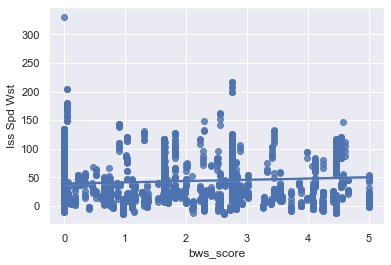

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="bws_score", y="Iss Spd Wst", data=final_risk);

In [100]:
y = final_risk["Iss Spd Wst"]
x = final_risk["bwd_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.503
Date:                Tue, 02 Aug 2022   Prob (F-statistic):             0.0190
Time:                        17:20:38   Log-Likelihood:                -14221.
No. Observations:                2840   AIC:                         2.845e+04
Df Residuals:                    2838   BIC:                         2.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0195      1.036     39.609      0.000      38.989      43.050
x              1.8689      0.797      2.346      0.019       0.307       3.431
==============================================================================
Omnibus:                      661.832   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.497
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       5.754   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
y = final_risk["Iss Spd Wst"]
x = final_risk["iav_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     21.65
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           3.43e-06
Time:                        17:20:49   Log-Likelihood:                -14213.
No. Observations:                2840   AIC:                         2.843e+04
Df Residuals:                    2838   BIC:                         2.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9393      1.667     29.962      0.000      46.671      53.207
x             -4.0812      0.877     -4.653      0.000      -5.801      -2.361
==============================================================================
Omnibus:                      688.591   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.936
Skew:                           1.312   Prob(JB):                         0.00
Kurtosis:                       5.769   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
y = final_risk["Iss Spd Wst"]
x = final_risk["gtd_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.34
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           9.10e-07
Time:                        17:20:58   Log-Likelihood:                -6799.4
No. Observations:                1340   AIC:                         1.360e+04
Df Residuals:                    1338   BIC:                         1.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2486      3.416     20.274      0.000      62.548      75.949
x             -9.2220      1.869     -4.933      0.000     -12.889      -5.555
==============================================================================
Omnibus:                      298.811   Durbin-Watson:                   0.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.863
Skew:                           1.176   Prob(JB):                    2.22e-166
Kurtosis:                       5.851   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Drought risk is significant correlated with issuance spread
rfr: Riverine flood risk   
y : Issuance spread to worst / Spread to maturity at issuance -- both are significant 

In [103]:
y = final_risk["Iss Spd Wst"]
# y = final_risk['YTW Sprd to Mty at Iss']
x = final_risk["drr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.55e-26
Time:                        17:21:06   Log-Likelihood:                -14169.
No. Observations:                2840   AIC:                         2.834e+04
Df Residuals:                    2838   BIC:                         2.835e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7740      4.256     -0.417      0.677     -10.119       6.571
x             21.2476      2.001     10.617      0.000      17.323      25.172
==============================================================================
Omnibus:                      815.073   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.004
Skew:                           1.438   Prob(JB):                         0.00
Kurtosis:                       6.741   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["drr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['Maturity']
x5 = final_risk['Time_to_Maturity']
x6 = final_risk['MSRB Volume']
# x6 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5, 'x6':x6
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3+x4+x5+x6', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     28.78
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.97e-31
Time:                        17:21:15   Log-Likelihood:                -3112.0
No. Observations:                 702   AIC:                             6238.
Df Residuals:                     695   BIC:                             6270.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2730.9164   6143.365      0.445      0.657   -9330.863    1.48e+04
x1            13.7616      2.133      6.452      0.000       9.574      17.949
x2            -6.0873      4.604     -1.322      0.187     -15.127       2.953
x3            -7.8589      0.778    -10.098      0.000      -9.387      -6.331
x4            -1.3561      3.039     -0.446      0.656      -7.323       4.611
x5             7.6300      3.057      2.496      0.013       1.628      13.632
x6         -1.578e-06   2.16e-06     -0.730      0.465   -5.82e-06    2.66e-06
==============================================================================
Omnibus:                      230.512   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              811.763
Skew:                           1.537   Prob(JB):                    5.34e-177
Kurtosis:                       7.278   Cond. No.                     3.05e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["drr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['Maturity']
x5 = final_risk['Time_to_Maturity']
# x6 = final_risk['MSRB Volume']
x6 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5, 'x6':x6
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3+x4+x6', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     30.15
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          4.40e-211
Time:                        17:23:45   Log-Likelihood:                -13641.
No. Observations:                2840   AIC:                         2.738e+04
Df Residuals:                    2792   BIC:                         2.766e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.148e+04   4820.444      6.530      0.000     2.2e+04    4.09e+04
x6[T.AR]      -5.7212     10.543     -0.543      0.587     -26.393      14.951
x6[T.AZ]      -7.1951      8.098     -0.888      0.374     -23.074       8.684
x6[T.CA]     -17.0394      5.742     -2.967      0.003     -28.299      -5.780
x6[T.CO]     -42.6455      8.687     -4.909      0.000     -59.680     -25.611
x6[T.CT]     -30.8875     10.369     -2.979      0.003     -51.220     -10.555
x6[T.DC]     -37.7746     14.427     -2.618      0.009     -66.063      -9.486
x6[T.FL]      29.3351      9.885      2.968      0.003       9.952      48.718
x6[T.GA]     -15.7894     11.257     -1.403      0.161     -37.862       6.283
x6[T.IA]     -35.3842      8.850     -3.998      0.000     -52.738     -18.030
x6[T.ID]      -5.6882     14.348     -0.396      0.692     -33.821      22.445
x6[T.IL]       7.5178      7.906      0.951      0.342      -7.984      23.020
x6[T.IN]     -21.7107      8.861     -2.450      0.014     -39.086      -4.335
x6[T.KS]     -34.6354      7.769     -4.458      0.000     -49.869     -19.402
x6[T.KY]     -17.3714      9.286     -1.871      0.061     -35.579       0.836
x6[T.MA]     -40.0176      6.712     -5.962      0.000     -53.178     -26.857
x6[T.MD]     -32.9527      7.767     -4.243      0.000     -48.183     -17.723
x6[T.ME]     -47.4498     13.921     -3.409      0.001     -74.745     -20.154
x6[T.MI]     -27.7524      6.938     -4.000      0.000     -41.356     -14.149
x6[T.MN]     -40.9446      6.931     -5.908      0.000     -54.534     -27.355
x6[T.MO]      -6.6393      8.444     -0.786      0.432     -23.196       9.918
x6[T.MS]     -42.0473      7.959     -5.283      0.000     -57.653     -26.442
x6[T.NC]     -31.1317      8.015     -3.884      0.000     -46.847     -15.416
x6[T.ND]      -2.3819     18.595     -0.128      0.898     -38.844      34.080
x6[T.NE]     -15.7524     21.747     -0.724      0.469     -58.394      26.889
x6[T.NH]     -49.6101     13.904     -3.568      0.000     -76.873     -22.347
x6[T.NJ]     -34.6310      6.465     -5.357      0.000     -47.307     -21.955
x6[T.NM]     -16.6156      9.954     -1.669      0.095     -36.133       2.902
x6[T.NV]      40.0236      7.180      5.574      0.000      25.945      54.102
x6[T.NY]     -43.6214      6.144     -7.100      0.000     -55.669     -31.574
x6[T.OH]     -62.0796     10.496     -5.915      0.000     -82.660     -41.499
x6[T.OK]     -44.3077      9.842     -4.502      0.000     -63.606     -25.009
x6[T.OR]     -52.5481     14.393     -3.651      0.000     -80.770     -24.327
x6[T.PA]     -15.1081      9.352     -1.615      0.106     -33.446       3.230
x6[T.RI]     -30.9324     10.998     -2.813      0.005     -52.498      -9.367
x6[T.SC]     -30.5158      7.950     -3.839      0.000     -46.104     -14.928
x6

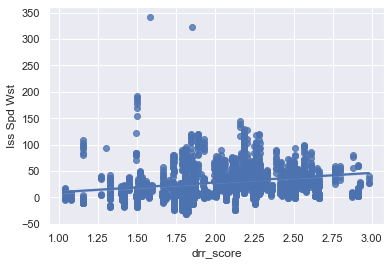

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="drr_score", y="Iss Spd Wst", data=final_risk);

NOTE 
* cfr: Coastal flood risk

In [105]:
y = final_risk["Iss Spd Wst"]
x = final_risk["cfr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           5.63e-24
Time:                        17:21:25   Log-Likelihood:                -14173.
No. Observations:                2840   AIC:                         2.835e+04
Df Residuals:                    2838   BIC:                         2.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6310      0.690     64.671      0.000      43.278      45.984
x            -18.0397      1.770    -10.190      0.000     -21.511     -14.569
==============================================================================
Omnibus:                      677.260   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1723.491
Skew:                           1.282   Prob(JB):                         0.00
Kurtosis:                       5.826   Cond. No.                         2.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
y = final_risk["Iss Spd Wst"]
x1 = final_risk["cfr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['Maturity']
x5 = final_risk['Time_to_Maturity']
x6 = final_risk['MSRB Volume']
# x6 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5, 'x6':x6
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3+x4+x5+x6', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     21.94
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.07e-23
Time:                        17:21:34   Log-Likelihood:                -3129.0
No. Observations:                 702   AIC:                             6272.
Df Residuals:                     695   BIC:                             6304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2296.6073   6301.008      0.364      0.716   -1.01e+04    1.47e+04
x1            -4.4314      1.704     -2.601      0.009      -7.777      -1.086
x2            -5.8754      4.750     -1.237      0.217     -15.202       3.451
x3            -8.4341      0.791    -10.662      0.000      -9.987      -6.881
x4            -1.1241      3.117     -0.361      0.718      -7.244       4.996
x5             6.9296      3.147      2.202      0.028       0.750      13.109
x6         -1.666e-06   2.21e-06     -0.752      0.452   -6.01e-06    2.68e-06
==============================================================================
Omnibus:                      242.856   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.808
Skew:                           1.593   Prob(JB):                    5.57e-202
Kurtosis:                       7.640   Cond. No.                     3.06e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Riverine flood risk

rfr: Riverine flood risk

In [107]:
y = final_risk["Iss Spd Wst"]
# y = final_risk["YTW Sprd to Mty at Iss"]
x = final_risk["rfr_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.13e-38
Time:                        17:21:40   Log-Likelihood:                -14139.
No. Observations:                2840   AIC:                         2.828e+04
Df Residuals:                    2838   BIC:                         2.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7199      1.131     27.154      0.000      28.502      32.938
x              8.1554      0.618     13.204      0.000       6.944       9.367
==============================================================================
Omnibus:                      752.707   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2211.647
Skew:                           1.362   Prob(JB):                         0.00
Kurtosis:                       6.357   Cond. No.                         3.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:

# x4 = final_risk['State Code']
y = final_risk["Iss Spd Wst"]
x1 = final_risk["rfr_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['Maturity']
x5 = final_risk['Time_to_Maturity']
# x6 = final_risk['MSRB Volume']
x6 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5, 'x6':x6
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3+x4+x6', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     31.11
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          2.31e-217
Time:                        17:21:48   Log-Likelihood:                -13626.
No. Observations:                2840   AIC:                         2.735e+04
Df Residuals:                    2792   BIC:                         2.763e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.045e+04   4793.494      6.353      0.000    2.11e+04    3.99e+04
x6[T.AR]      -5.6439     10.380     -0.544      0.587     -25.997      14.709
x6[T.AZ]      -9.0696      7.845     -1.156      0.248     -24.451       6.312
x6[T.CA]     -18.9134      5.698     -3.319      0.001     -30.086      -7.741
x6[T.CO]     -41.9592      8.637     -4.858      0.000     -58.895     -25.023
x6[T.CT]     -34.6210     10.031     -3.452      0.001     -54.289     -14.953
x6[T.DC]     -36.7688     14.292     -2.573      0.010     -64.792      -8.746
x6[T.FL]      19.4878      9.846      1.979      0.048       0.181      38.795
x6[T.GA]     -16.6514     11.190     -1.488      0.137     -38.594       5.291
x6[T.IA]     -28.8116      6.751     -4.268      0.000     -42.049     -15.574
x6[T.ID]      -5.1918     14.261     -0.364      0.716     -33.155      22.771
x6[T.IL]      10.1280      6.491      1.560      0.119      -2.599      22.855
x6[T.IN]     -17.2384      7.671     -2.247      0.025     -32.279      -2.198
x6[T.KS]     -32.1790      6.800     -4.732      0.000     -45.513     -18.845
x6[T.KY]     -15.7134      8.906     -1.764      0.078     -33.176       1.749
x6[T.MA]     -47.4409      6.235     -7.609      0.000     -59.667     -35.215
x6[T.MD]     -31.9140      7.681     -4.155      0.000     -46.974     -16.854
x6[T.ME]     -63.9267     13.366     -4.783      0.000     -90.136     -37.718
x6[T.MI]     -32.8087      6.891     -4.761      0.000     -46.321     -19.296
x6[T.MN]     -38.1397      6.089     -6.264      0.000     -50.078     -26.201
x6[T.MO]      -1.4448      7.427     -0.195      0.846     -16.008      13.118
x6[T.MS]     -42.5530      7.843     -5.425      0.000     -57.933     -27.173
x6[T.NC]     -30.0666      7.939     -3.787      0.000     -45.634     -14.499
x6[T.ND]      -5.5146     17.971     -0.307      0.759     -40.752      29.723
x6[T.NE]     -16.6581     21.628     -0.770      0.441     -59.066      25.750
x6[T.NH]     -63.7936     13.354     -4.777      0.000     -89.979     -37.608
x6[T.NJ]     -34.1544      6.430     -5.312      0.000     -46.763     -21.546
x6[T.NM]     -24.2078      9.806     -2.469      0.014     -43.435      -4.980
x6[T.NV]      34.6037      6.878      5.031      0.000      21.117      48.090
x6[T.NY]     -46.0046      6.077     -7.571      0.000     -57.920     -34.090
x6[T.OH]     -56.6898      9.844     -5.759      0.000     -75.993     -37.387
x6[T.OK]     -39.2466      9.297     -4.221      0.000     -57.476     -21.017
x6[T.OR]     -59.0313     14.263     -4.139      0.000     -86.998     -31.064
x6[T.PA]     -15.8725      9.303     -1.706      0.088     -34.114       2.369
x6[T.RI]     -39.7712     10.787     -3.687      0.000     -60.923     -18.620
x6[T.SC]     -34.7824      7.944     -4.378      0.000     -50.360     -19.205
x6

## Physical risk quality:   
ucw: Untreated connected wastewater   
cep:Coastal eutrophication potential

In [109]:
y = final_risk["Iss Spd Wst"]
# y = final_risk["YTW Sprd to Mty at Iss"]
x = final_risk["cep_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     52.90
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           4.52e-13
Time:                        17:22:13   Log-Likelihood:                -14198.
No. Observations:                2840   AIC:                         2.840e+04
Df Residuals:                    2838   BIC:                         2.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.4660      2.513     24.057      0.000      55.538      65.394
x             -6.3989      0.880     -7.273      0.000      -8.124      -4.674
==============================================================================
Omnibus:                      646.629   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1535.796
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                       5.584   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:

# x4 = final_risk['State Code']
y = final_risk["Iss Spd Wst"]
x1 = final_risk["ucw_score"]
x2 = final_risk['Mod Dur (Mid)']
x3 = final_risk['Cpn']
x4 = final_risk['Maturity']
x5 = final_risk['Time_to_Maturity']
# x6 = final_risk['MSRB Volume']
# x6 = final_risk['State Code']
df = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2, 'x3':x3, 'x4':x4,'x5':x5, 'x6':x6
                   # , 'x4':x4
                  })
model = sm.ols('y~x1+x2+x3+x4', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.97e-63
Time:                        17:22:25   Log-Likelihood:                -14077.
No. Observations:                2840   AIC:                         2.816e+04
Df Residuals:                    2836   BIC:                         2.819e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.088e+04   2920.577      7.150      0.000    1.52e+04    2.66e+04
x1          1.839e+04   2572.103      7.150      0.000    1.33e+04    2.34e+04
x2            18.3336      2.904      6.313      0.000      12.639      24.028
x3            -8.3253      0.620    -13.429      0.000      -9.541      -7.110
x4           -18.2989      2.565     -7.135      0.000     -23.328     -13.270
==============================================================================
Omnibus:                      836.341   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.373
Skew:                           1.409   Prob(JB):                         0.00
Kurtosis:                       7.392   Cond. No.                     4.67e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Regulatory and reputational risk:

udw:Unimproved/no drinking water   
usa:Unimproved/no sanitation   
rri:Peak RepRisk country ESG risk index (should be excluded since it is a uniform score for United States)

In [111]:
y = final_risk["Iss Spd Wst"]
# y = final_risk["YTW Sprd to Mty at Iss"]
x = final_risk["udw_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     53.20
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           3.89e-13
Time:                        17:22:32   Log-Likelihood:                -14198.
No. Observations:                2840   AIC:                         2.840e+04
Df Residuals:                    2838   BIC:                         2.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.1749      0.897     52.590      0.000      45.416      48.934
x            -10.3709      1.422     -7.294      0.000     -13.159      -7.583
==============================================================================
Omnibus:                      656.277   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.294
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       5.789   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
y = final_risk["Iss Spd Wst"]
# y = final_risk["YTW Sprd to Mty at Iss"]
x = final_risk["usa_score"]
df = pd.DataFrame({'x':x, 'y':y})
model = sm.ols('y~x', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.99
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           0.000187
Time:                        17:22:37   Log-Likelihood:                -14217.
No. Observations:                2840   AIC:                         2.844e+04
Df Residuals:                    2838   BIC:                         2.845e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.3963      0.689     61.525      0.000      41.045      43.747
x              7.9770      2.133      3.741      0.000       3.796      12.158
==============================================================================
Omnibus:                      664.180   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1675.063
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       5.791   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""